# Escalamiento de datos del data set de vinos

Observamos que tras el escalamiento de los datos la distribución de los datos que se muestra en el histograma, antes y después del escalamiento, es la misma.




In [1]:
# LIBRERÍAS EMPLEADAS EN EL EJEMPLO
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
# Preprocesado
#==============================================================================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler  # Para el escalamiento Estandarización Z
from sklearn.preprocessing import MinMaxScaler # Para el escalamiento por Rangos
from sklearn.compose import make_column_selector
from sklearn import datasets



In [2]:
#Carga del dataset de diabetes
# Titulo: Wine recognition dataset
# Url: https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset

X, y= datasets.load_wine(return_X_y=True)
df_wines = datasets.load_wine(as_frame=True)

# Selecciona la segunda columna: bmi body mass index
raw = X[:, None,0]

Data_alcohol = pd.DataFrame(raw, columns=['alcohol'])

# Escalamiento
# ==============================================================================
# Selección de columnas numéricas
numeric_cols = Data_alcohol.select_dtypes(include=['float64', 'int']).columns.to_list()
# Standard scaler - Definimos el tipo de escalamientoa realizar: estandarización Z-score
preprocessor_SS = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols)],remainder='passthrough')

# MinMaxScaler - Definimos el tipo de escalamiento a realizar: Estandarización por rangos
preprocessor_RR = ColumnTransformer(
                   [('scale', MinMaxScaler(), numeric_cols)],remainder='passthrough')

Data_alcohol_prep_SS = preprocessor_SS.fit_transform(Data_alcohol)
Data_alcohol_prep_RR = preprocessor_RR.fit_transform(Data_alcohol)

# Ponermos en un dataframe las tres columnas para ver las diferencias entre valores no escalados y escalados:
# los valores inciciales, y los valores escalados con los dos métodos.
Data_alcohol_compared_scaled_array=np.column_stack((raw, Data_alcohol_prep_SS, Data_alcohol_prep_RR))
Data_alcohol_compared_scaled_df = pd.DataFrame(Data_alcohol_compared_scaled_array, columns=['alcohol_original', 'Data_alcohol_SS', 'Data_alcohol_RR'])

Data_alcohol_compared_scaled_df

,alcohol_original,Data_alcohol_SS,Data_alcohol_RR
0,14.23,1.518613,0.842105
1,13.20,0.246290,0.571053
2,13.16,0.196879,0.560526
3,14.37,1.691550,0.878947
4,13.24,0.295700,0.581579
...,...,...,...
173,13.71,0.876275,0.705263
174,13.40,0.493343,0.623684
175,13.27,0.332758,0.589474
176,13.17,0.209232,0.563158


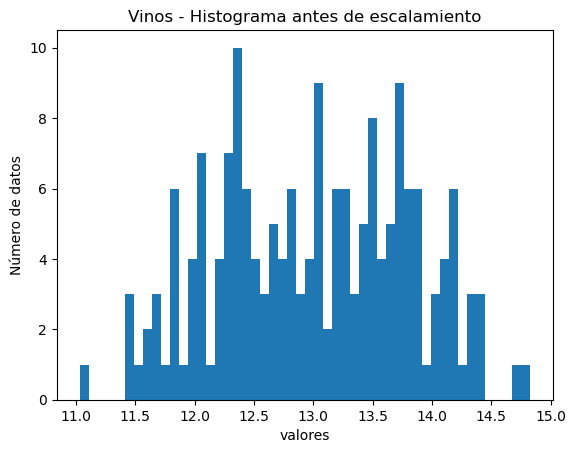

In [3]:
# Mostramos el histograma
plt.hist(raw, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Vinos - Histograma antes de escalamiento')
plt.show()

Representacióón de los datos escalado con **Standard Scaler**
 - Estandariación/Escalamiento por desviación típica


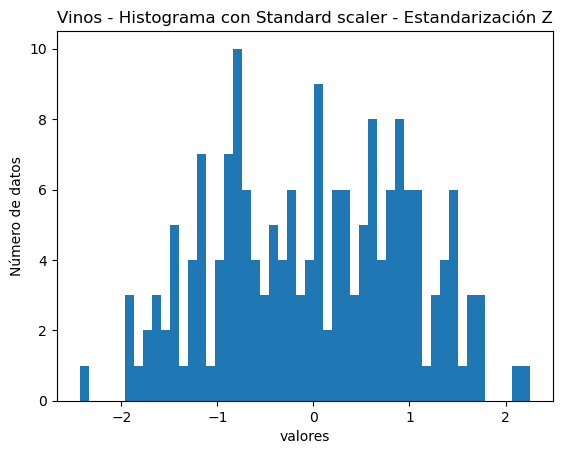

In [4]:
plt.hist(Data_alcohol_prep_SS, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Vinos - Histograma con Standard scaler - Estandarización Z')
plt.show()

**NOTA** Observar que las **dos** variables tienen la misma desviación típica (s=1)

In [5]:
Data_alcohol_prep_SS.std()


1.0

Representación de los datos escalado con **Min Max Scaler** - Estandariación/Escalamiento por rangos



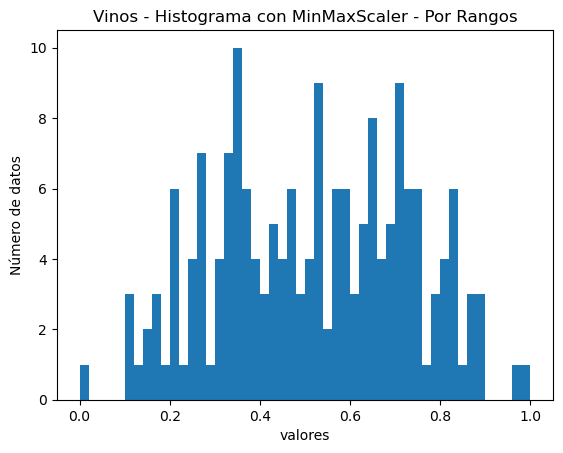

In [6]:
plt.hist(Data_alcohol_prep_RR, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Vinos - Histograma con MinMaxScaler - Por Rangos')
plt.show()

**NOTA** Observar que las **dos** variables tienen el mismo rango

In [7]:
#Rango
#Data_prep_RR[:,0]
np.max(Data_alcohol_prep_RR[:,0])-np.min(Data_alcohol_prep_RR[:,0])

1.0

In [8]:
# No tengo claro cómo interpreatra el siguiente cálculo del rango
#Rango
#Data_prep_SS[:,1]
np.max(Data_alcohol_prep_SS[:,0])-np.min(Data_alcohol_prep_SS[:,0])

4.694006867088876